<a href="https://colab.research.google.com/github/EniolaAke/Image-Classification-ml/blob/main/Image-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

Upload the data.csv file, then run the next cell to read that.

In [ ]:
df = pd.read_csv("data.csv")
file_path = 'data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [ ]:
print(df.shape)

(2500, 3073)


In [ ]:
def display_image_from_csv(df, row_number):

    # Extract the image data and label from the specified row
    row_data = df.iloc[row_number]
    label = row_data['label']
    image_data = row_data[:-1].values  # Exclude the label column

    # Reshape the image data to 32x32x3
    image = image_data.reshape(3, 32, 32).transpose([1, 2, 0])

    # Display the image
    plt.figure(figsize=(1, 1))
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

Change the number below to another number between 0 and 2500 to see a different image.

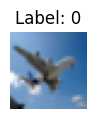

In [ ]:
# Example usage 1:
display_image_from_csv(df, 50)

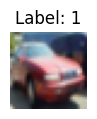

In [ ]:
# Example usage 2:
display_image_from_csv(df, 500)

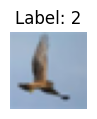

In [ ]:
# Example usage 3:
display_image_from_csv(df, 1200)

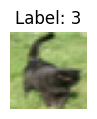

In [ ]:
# Example usage 4:
display_image_from_csv(df, 1500)

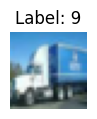

In [ ]:
# Example usage 5:
display_image_from_csv(df, 2000)

Start by splitting the dataset into training and testing sets to train your models

In [ ]:
# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
# Remove rows with any NaN values
data = data.dropna()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the pixel values
scaler = StandardScaler()
X = scaler.fit_transform(X)

Build and train classification models using KNN, DT, and MLP.

In [ ]:
# Initialize the KNNeighbours Model
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the Model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Initialize the Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Initialize the MLP Model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

In [ ]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

Evaluate the Metrics

In [ ]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
# Evaluate KNN
knn_metrics = evaluate_model(knn, X_test, y_test)
print("KNN Metrics:", knn_metrics)

KNN Metrics: (0.402, 0.45205749805202433, 0.402, 0.362823716100308)


In [ ]:
# Evaluate DT
dt_metrics = evaluate_model(dt, X_test, y_test)
print("DT Metrics:", dt_metrics)

DT Metrics: (0.386, 0.39088486963727925, 0.386, 0.38714204931990776)


In [ ]:
# Evaluate MLP
mlp_metrics = evaluate_model(mlp, X_test, y_test)
print("MLP Metrics:", mlp_metrics)

MLP Metrics: (0.4, 0.47210642265430214, 0.4, 0.3682237038486958)


Perform k-Fold Cross Validation on the Models

In [ ]:
# Function to perform k-fold cross-validation
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores

In [ ]:
# Cross-validate KNN
knn_cv_scores = cross_validate_model(knn, X, y)
print("KNN Cross-Validation Scores:", knn_cv_scores)

KNN Cross-Validation Scores: [0.388 0.386 0.404 0.356 0.388]


In [ ]:
# Cross-validate DT
dt_cv_scores = cross_validate_model(dt, X, y)
print("DT Cross-Validation Scores:", dt_cv_scores)

DT Cross-Validation Scores: [0.358 0.362 0.392 0.388 0.404]


In [ ]:
# Cross-validate MLP
mlp_cv_scores = cross_validate_model(mlp, X, y)
print("MLP Cross-Validation Scores:", mlp_cv_scores)

MLP Cross-Validation Scores: [0.548 0.532 0.538 0.538 0.56 ]
